## NBA Player Mobility
Interested in seeing whether or not [player mobility](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiCj42Vo-D5AhXxFmIAHZMjAkEQFnoECBYQAQ&url=https%3A%2F%2Fwww.sportskeeda.com%2Fbasketball%2Fcolin-cowherd-questions-benefits-nba-player-mobility&usg=AOvVaw3QnFKJow_2y2SuE-6sLkzm)actually has increased the past few years as pundits have dubbed it the *NBA's Player Empowerment Era.*

In [79]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')


In [65]:
# Reading in Basketball Reference's Player Mobility Matrix
matrix_path = "https://www.basketball-reference.com/friv/continuity.html"
df = pd.read_html(matrix_path, index_col="Season")[0]


In [73]:
# Cleaning up matrix df
from numpy import int64


# df = df.loc[df.index != "Season"]

df = df.replace({"%": ""}, regex=True)

# Casting team columns to int type
for c in df.columns[1::]:
    df[c] = df[c].astype(int)

df = df.dropna(axis=0, how="any")


df#.head()

,ATL,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,HOU,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
Season,,,,,,,,,,,,,,,,,,,,,
2021-22,84,69,71,48,61,75,75,70,68,58,...,57,71,79,77,56,69,73,65,78,47
2020-21,48,73,79,69,54,79,70,14,72,20,...,42,52,58,66,60,67,90,68,90,52
2019-20,49,70,65,56,70,68,80,56,22,65,...,47,81,59,51,55,67,80,82,61,40
2018-19,45,96,79,64,59,61,98,74,81,70,...,73,85,57,39,82,58,63,67,92,49
2017-18,51,41,73,51,53,74,80,59,81,59,...,52,62,61,64,93,44,87,84,51,82
2016-17,68,79,80,46,83,50,71,75,67,65,...,53,56,50,68,85,47,69,84,70,77
2015-16,87,85,51,90,84,55,70,50,95,85,...,93,76,63,53,47,52,69,62,77,75
2014-15,88,50,61,64,39,38,62,57,80,48,...,66,52,29,81,80,70,98,82,61,72
2013-14,53,59,64,69,60,48,62,59,71,77,...,89,81,37,46,65,53,83,68,62,77


/var/folders/60/nwdftyjj6cg3ysz_pf9stwtc0000gn/T/ipykernel_20660/23545645.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=season_avgs.index, rotation=90)


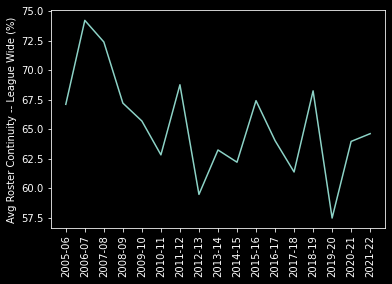

In [95]:
season_avgs = df.iloc[:, 1:31].mean(axis=1)[::-1]  # reversing the order for plotting (starting with oldest szn)

# Plotting avg roster continuity by season
f, ax = plt.subplots()
ax.plot(season_avgs.index, season_avgs)
ax.set_xticklabels(labels=season_avgs.index, rotation=90)
ax.set_ylabel("Avg Roster Continuity -- League Wide (%)")

f.savefig(os.path.join(".", "img", "nba_roster_continuity_avg.pdf"))

Siing a general downward trend in our plot over time. This means that NBA rosters have **more** turnover in the more recent years (in general)